# **EXER 6**

**Gajitos, Jude B**

**BSCS 3B**

# **1. Data Loading and Preprocessing**

In [2]:
import pandas as pd
import seaborn as sne
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
online_foods = pd.read_csv('onlinefoods.csv') #Load the Dataset
online_foods.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [ ]:
missing_values = online_foods.isnull().sum() #Handle Missing Values
print(missing_values)

df_dummies = pd.get_dummies(online_foods, drop_first = True) # For converting the categorical variable to numerical
print(df_dummies.columns)
# Feature Selection
x = df_dummies.drop(['Age', 'Gender_Male', 'Marital Status_Single', 'Occupation_House wife', 'Occupation_Self Employeed',
                     'Monthly Income_Below Rs.10000', 'Monthly Income_More than 50000', 'Monthly Income_No Income',
                     'Educational Qualifications_Ph.D', 'Educational Qualifications_Post Graduate',
                     'Educational Qualifications_School', 'Educational Qualifications_Uneducated',], axis = 1)
y = df_dummies['Feedback_Positive']

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64
Index(['Age', 'Family size', 'latitude', 'longitude', 'Pin code',
       'Gender_Male', 'Marital Status_Prefer not to say',
       'Marital Status_Single', 'Occupation_House wife',
       'Occupation_Self Employeed', 'Occupation_Student',
       'Monthly Income_25001 to 50000', 'Monthly Income_Below Rs.10000',
       'Monthly Income_More than 50000', 'Monthly Income_No Income',
       'Educational Qualifications_Ph.D',
       'Educational Qualifications_Post Graduate',
       'Educational Qualifications_School',
       'Educational Qualifications_Uneducated', 'Outp

# **2. Exploratory Data Analysis (EDA)**

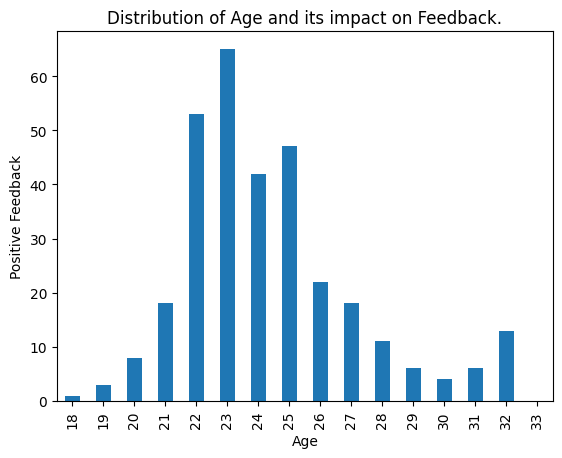

In [ ]:
# Descriptive Analysis using .describe()
online_foods.describe()

import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of Age and its impact on Feedback.
age_feedback = df_dummies.groupby('Age')['Feedback_Positive'].sum()
age_feedback.plot(kind = 'bar')
plt.xlabel("Age")
plt.ylabel("Positive Feedback")
plt.title("Distribution of Age and its impact on Feedback.")
plt.show()

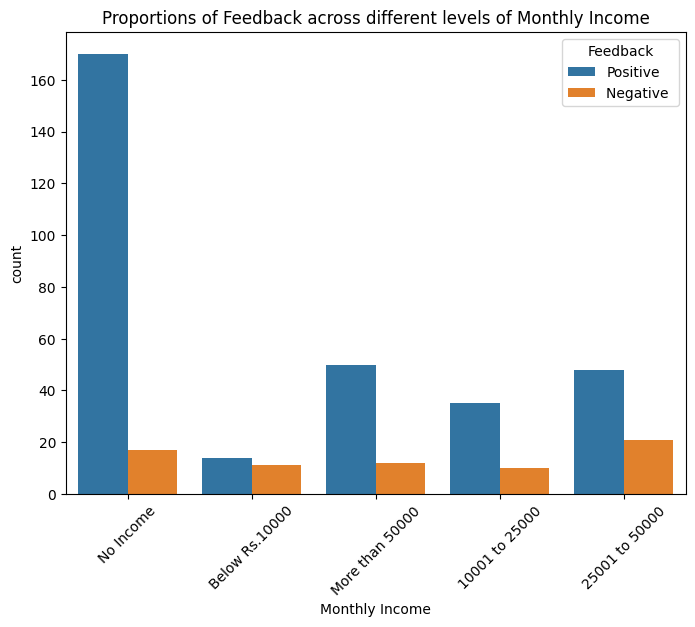

In [ ]:
# Proportions of Feedback across different levels of Monthly Income.
plt.figure(figsize=(8, 6))
sns.countplot(x='Monthly Income', hue='Feedback', data = online_foods)
plt.title('Proportions of Feedback across different levels of Monthly Income')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Correlation Analysis')

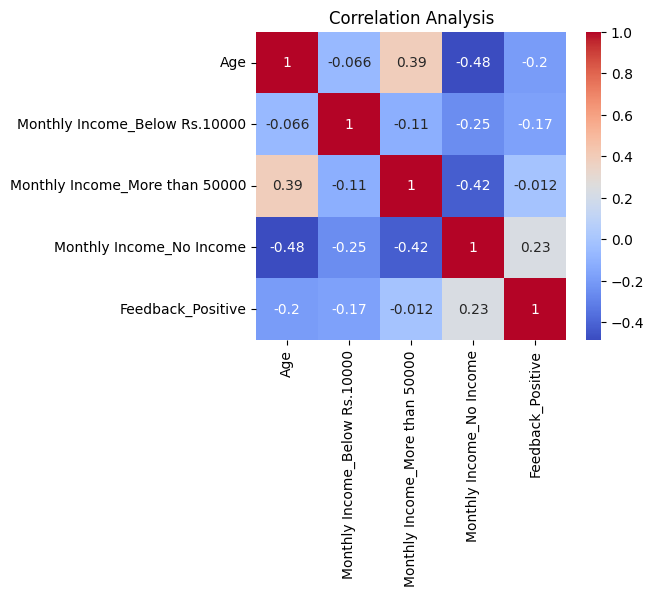

In [ ]:
# Correlation matrix heatmap to identify any interesting correlations between features.
correlation_matrix = df_dummies[['Age', 'Monthly Income_Below Rs.10000', 'Monthly Income_More than 50000', 'Monthly Income_No Income', 'Feedback_Positive']].corr()
plt.figure(figsize = (5,4))
sne.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title("Correlation Analysis")

# **3. Logistic Regression Model**

In [ ]:
# Split the Data into Training and Test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Building the Model
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Prediction
y_pred = model.predict(x_test_scaled)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'Classification Report: \n{class_report}')

Accuracy: 1.0
Confusion Matrix: 
[[11  0]
 [ 0 67]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        67

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



# **4. Data Analysis and Visualization**

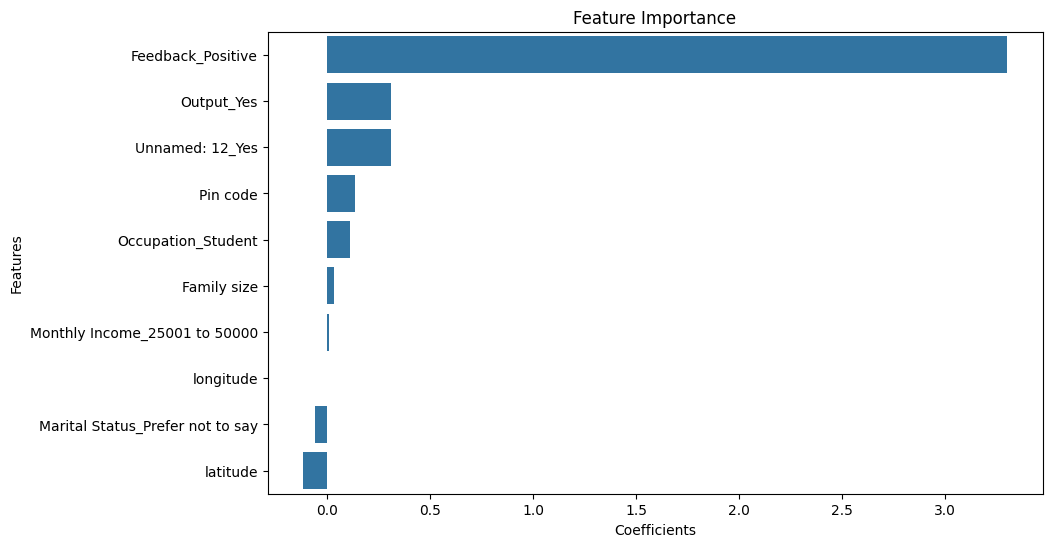

In [ ]:
# Visualize the importance of different features in your logistic regression model.
feature_importance = pd.Series(model.coef_[0], index = x.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()

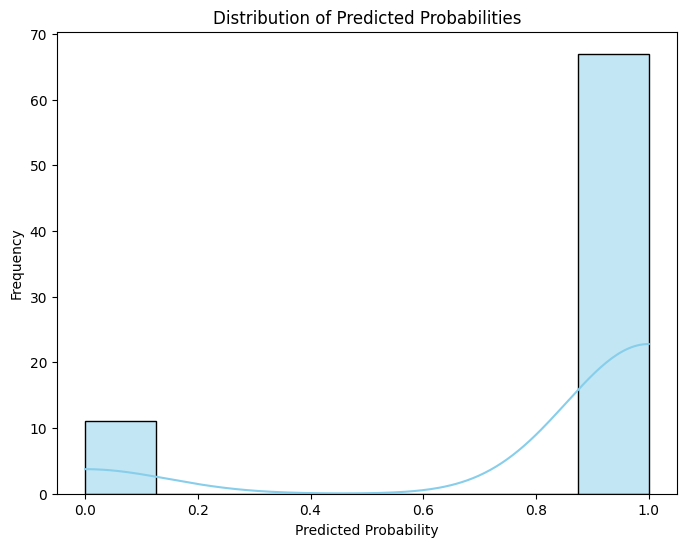

In [ ]:
#  Visualize the distribution of predicted probabilities.
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, kde=True, color='skyblue')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()